## Importing Libraries 

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense,  Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np
import pandas as pd
from keras.utils import np_utils

## Data Preprocessing 

In [121]:
labels = ['0', '1','2','3','4','5','6','7','8','9']
img_size = 32
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                #img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                img_arr = cv2.imread(os.path.join(path, img),0) #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [122]:
#val = get_data('/content/drive/MyDrive/Neural Network/val')
train = get_data('/content/drive/MyDrive/Neural Network/train')

<ipython-input-121-1fb4ed2d53e4>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [123]:
val = get_data('/content/drive/MyDrive/Neural Network/val')

<ipython-input-121-1fb4ed2d53e4>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [124]:
l = []
for i in train:
    if(i[1] == 0):
        l.append(0)
    else:
      if (i[1] == 1):
        l.append(1)
      else :
          if(i[1] == 2):
            l.append(2)
          else:
           if (i[1] == 3):
              l.append(3)
           else :
             if (i[1] == 4):
               l.append(4)
             else :
              if (i[1] == 5):
                l.append(5)
              else :
                if (i[1] == 6):
                  l.append(6)
                else :
                  if (i[1] == 7):
                    l.append(7)
                  else :
                    if (i[1] == 8):
                      l.append(8)
                    else :
                      if (i[1] == 9):
                        l.append(9)
                      


In [125]:
m = []
for i in val:
    if(i[1] == 0):
        m.append(0)
    else:
      if (i[1] == 1):
        m.append(1)
      else :
          if(i[1] == 2):
            m.append(2)
          else:
           if (i[1] == 3):
              m.append(3)
           else :
             if (i[1] == 4):
               m.append(4)
             else :
              if (i[1] == 5):
                m.append(5)
              else :
                if (i[1] == 6):
                  m.append(6)
                else :
                  if (i[1] == 7):
                    m.append(7)
                  else :
                    if (i[1] == 8):
                      m.append(8)
                    else :
                      if (i[1] == 9):
                        m.append(9)

Text(0.5, 1.0, '0')

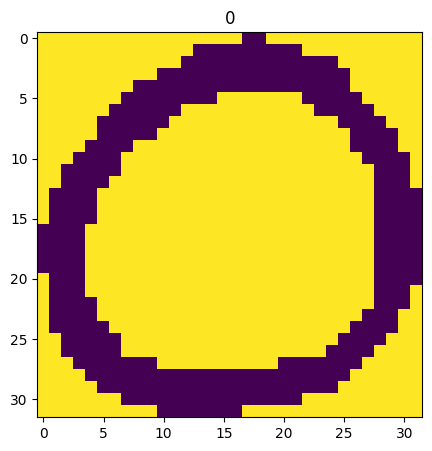

In [126]:
plt.figure(figsize = (5,5))
plt.imshow(train[20][0])
plt.title(labels[train[20][1]])

Text(0.5, 1.0, '1')

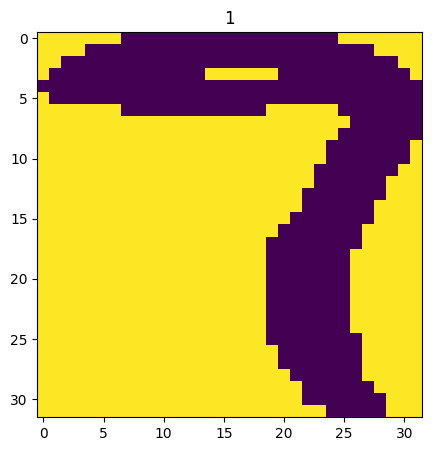

In [127]:
plt.figure(figsize = (5,5))
plt.imshow(val[20][0])
plt.title(labels[val[20][1]])

In [128]:
print(train.shape)
print(val.shape)

(1000, 2)
(178, 2)


In [129]:
x_train = []
y_train = []
x_val = []
y_val = []

In [130]:
for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

In [131]:
for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

In [132]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

In [133]:
x_train.shape

(1000, 32, 32)

In [134]:
x_val.shape

(178, 32, 32)

In [135]:
img_size = 32

In [136]:
x_train=x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val=x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [137]:
print(x_train.shape)
print(x_val.shape)

(1000, 32, 32, 1)
(178, 32, 32, 1)


In [138]:
num_classes = 10

In [139]:
y_train_o = keras.utils.np_utils.to_categorical(y_train, num_classes)

In [140]:
y_train_o.shape

(1000, 10)

In [141]:
y_train_o[550]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [142]:
y_val_o = keras.utils.np_utils.to_categorical(y_val, num_classes)

In [143]:
print(y_val[176])
print(y_val_o[176])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


##ANN model set up 

In [144]:
x_train.shape

(1000, 32, 32, 1)

In [145]:
model = Sequential()
model.add(Flatten(input_shape=(32,32)))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='Softmax'))


In [146]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [147]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [148]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 1024)              0         
                                                                 
 dense_24 (Dense)            (None, 32)                32800     
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 10)                170       
                                                                 
Total params: 33,498
Trainable params: 33,498
Non-trai

In [149]:
model_fit = model.fit(x_train,y_train_o,steps_per_epoch = 3,epochs= 500,validation_data=(x_val,y_val_o),callbacks=[early_stop])
#model_fit = model.fit(x_train,y_train_o,steps_per_epoch = 3,epochs= 500,validation_data=(x_val,y_val_o))

Epoch 1/500
3/3 [==============================] - 1s 122ms/step - loss: 2.3826 - accuracy: 0.1080 - val_loss: 2.2205 - val_accuracy: 0.2022
Epoch 2/500
3/3 [==============================] - 0s 33ms/step - loss: 2.2203 - accuracy: 0.1680 - val_loss: 2.1294 - val_accuracy: 0.2416
Epoch 3/500
3/3 [==============================] - 0s 27ms/step - loss: 2.0816 - accuracy: 0.2290 - val_loss: 1.9993 - val_accuracy: 0.3596
Epoch 4/500
3/3 [==============================] - 0s 35ms/step - loss: 1.9595 - accuracy: 0.3140 - val_loss: 1.9137 - val_accuracy: 0.4270
Epoch 5/500
3/3 [==============================] - 0s 28ms/step - loss: 1.8460 - accuracy: 0.3500 - val_loss: 1.8310 - val_accuracy: 0.4326
Epoch 6/500
3/3 [==============================] - 0s 30ms/step - loss: 1.7686 - accuracy: 0.3550 - val_loss: 1.7528 - val_accuracy: 0.4551
Epoch 7/500
3/3 [==============================] - 0s 28ms/step - loss: 1.6729 - accuracy: 0.3900 - val_loss: 1.6529 - val_accuracy: 0.5000
Epoch 8/500
3/3 [==

In [150]:
metrics = pd.DataFrame(model.history.history)

In [151]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,2.382647,0.108,2.220539,0.202247
1,2.220263,0.168,2.129353,0.241573
2,2.081593,0.229,1.999320,0.359551
3,1.959540,0.314,1.913724,0.426966
4,1.846010,0.350,1.830980,0.432584
5,1.768583,0.355,1.752806,0.455056
6,1.672861,0.390,1.652862,0.500000
7,1.569861,0.449,1.564321,0.533708
8,1.489532,0.485,1.484778,0.550562
9,1.436186,0.503,1.420614,0.606742


<Axes: >

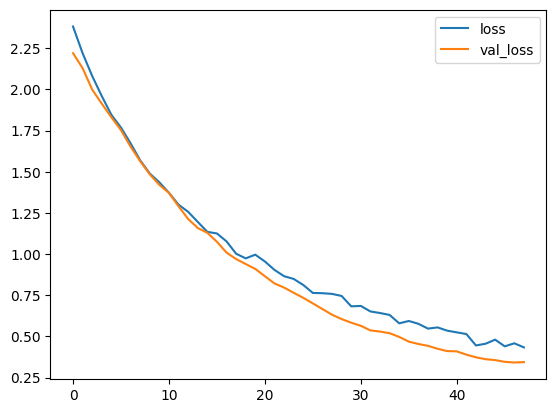

In [152]:
metrics[['loss','val_loss']].plot()

<Axes: >

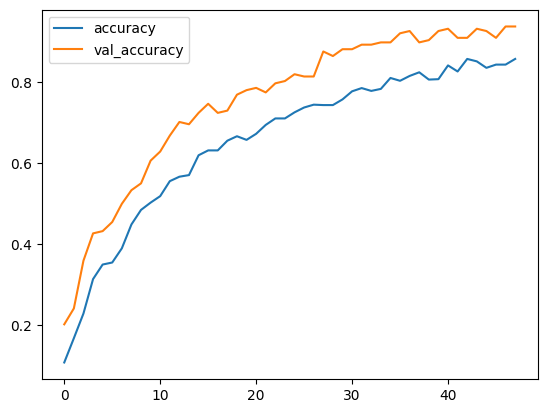

In [153]:
metrics[['accuracy','val_accuracy']].plot()

In [154]:
model.evaluate(x_train,y_train_o,verbose=1)

32/32 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.9780


[0.151590496301651, 0.9779999852180481]

In [155]:
model.evaluate(x_val,y_val_o,verbose=1)

6/6 [==============================] - 0s 5ms/step - loss: 0.3440 - accuracy: 0.9382


[0.34403717517852783, 0.9382022619247437]

## Testing with predictionfrom the training and validation set

Actual Output :  9
1/1 [==============================] - 0s 25ms/step
precdicted output: 9
Rightly predicted by Model


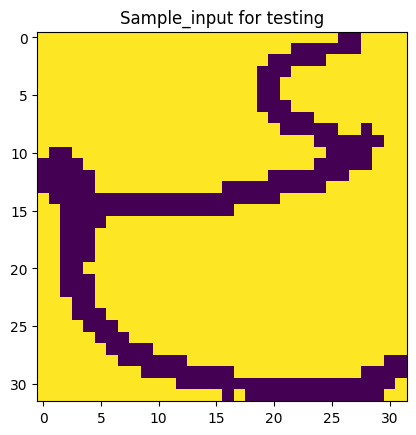

In [50]:
index = 177
sample_input = x_val[index]
plt.title("Sample_input for testing")
plt.imshow(sample_input)

y_actual = np.argmax(y_val_o[index])
print("Actual Output : ", y_actual)
y_predict = np.argmax(model.predict(sample_input.reshape(1,32,32,1)))
print("precdicted output:",y_predict)
if y_actual == y_predict :
  print("Rightly predicted by Model")

Actual Output :  6
1/1 [==============================] - 0s 22ms/step
precdicted output: 6
Rightly predicted by Model


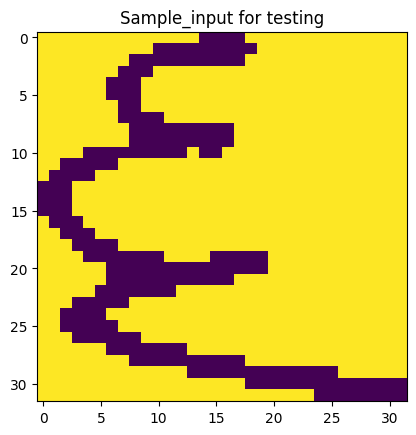

In [51]:
index = 105
sample_input = x_val[index]
plt.title("Sample_input for testing")
plt.imshow(sample_input)

y_actual = np.argmax(y_val_o[index])
print("Actual Output : ", y_actual)
y_predict = np.argmax(model.predict(sample_input.reshape(1,32,32,1)))
print("precdicted output:",y_predict)
if y_actual == y_predict :
  print("Rightly predicted by Model")

Actual Output :  1
1/1 [==============================] - 0s 29ms/step
precdicted output: 1
Rightly predicted by Model


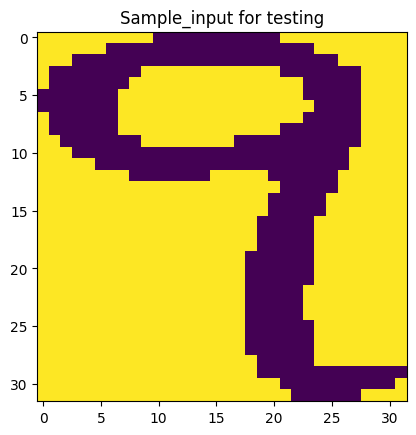

In [52]:
index = 105
sample_input = x_train[index]
plt.title("Sample_input for testing")
plt.imshow(sample_input)

y_actual = np.argmax(y_train_o[index])
print("Actual Output : ", y_actual)
y_predict = np.argmax(model.predict(sample_input.reshape(1,32,32,1)))
print("precdicted output:",y_predict)
if y_actual == y_predict :
  print("Rightly predicted by Model")

Actual Output :  9
1/1 [==============================] - 0s 35ms/step
precdicted output: 9
Rightly predicted by Model


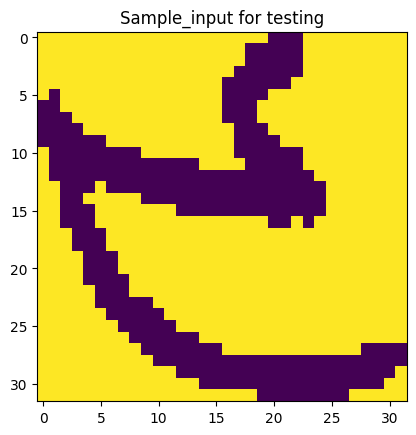

In [53]:
index = 990
sample_input = x_train[index]
plt.title("Sample_input for testing")
plt.imshow(sample_input)

y_actual = np.argmax(y_train_o[index])
print("Actual Output : ", y_actual)
y_predict = np.argmax(model.predict(sample_input.reshape(1,32,32,1)))
print("precdicted output:",y_predict)
if y_actual == y_predict :
  print("Rightly predicted by Model")